In [2]:
!git clone https://github.com/shank250/Multi-agent-System-for-converting-NL-to-SQL.git

fatal: destination path 'Multi-agent-System-for-converting-NL-to-SQL' already exists and is not an empty directory.


In [8]:
from IPython.display import display, HTML

def scroll_output(content, height=300):
    display(HTML(f'<div style="max-height:{height}px; overflow:auto; white-space:pre">{content}</div>'))


In [21]:
!pip install evaluate
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.4 MB/s eta 0:00:00


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [10]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# print(torch.cuda.is_available())

In [38]:
from datasets import Dataset, DatasetDict

dataset = pd.read_csv("/content/single_line_sep_prompt_balanaced.csv")

# Rename columns for consistency
dataset = dataset.rename(columns={"Prompt": "text", "Label": "labels"})  # Fix typo in 'Lables'

# Convert Pandas DataFrame to Hugging Face Dataset
hf_dataset = Dataset.from_pandas(dataset)

# Split into train and test sets (e.g., 80% train, 20% test)
split_dataset = hf_dataset.train_test_split(test_size=0.2)

# Convert to DatasetDict format
raw_dataset = DatasetDict({
    "train": split_dataset["train"],
    "test": split_dataset["test"]
})

# Print dataset structure
print(raw_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels'],
        num_rows: 2276
    })
    test: Dataset({
        features: ['text', 'labels'],
        num_rows: 569
    })
})


In [39]:
from transformers import AutoTokenizer

# Initialize the BERT tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize a sample text
sample_text = "I absolutely loved this movie! Highly recommend it."
tokens = tokenizer(sample_text, padding="max_length", truncation=True, max_length=128)

print(tokens)

{'input_ids': [101, 1045, 7078, 3866, 2023, 3185, 999, 3811, 16755, 2009, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Apply the tokenizer to the dataset
tokenized_datasets = raw_dataset.map(tokenize_function)

# Inspect tokenized samples
print(tokenized_datasets.shape)

Map:   0%|          | 0/2276 [00:00<?, ? examples/s]

Map:   0%|          | 0/569 [00:00<?, ? examples/s]

{'train': (2276, 5), 'test': (569, 5)}


In [41]:
print(tokenized_datasets)

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2276
    })
    test: Dataset({
        features: ['text', 'labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 569
    })
})


## Some key observations and further improvements

1. I should make 2-3 different datasets [done and updated in the github repo]
2. One could be like having balanced classes [added]
3. Another improvement is to reduce the size of the prompt by removing the uneccessay context which we are passing as a table schema. That part seems to me irrelevant. [done]



## Experimentations

Currently I am not freezing all the layers, this is because I think we are having very small dataset and context of the dataset is required to be passed.
We can further try with freezed layers and check the performance.

Moreover, I can try to toggle the bert archetecture too.

## Training Pipeline

In [57]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",           # Directory for saving model checkpoints
    evaluation_strategy="epoch",     # Evaluate at the end of each epoch
    learning_rate=3e-5,              # Start with a small learning rate
    per_device_train_batch_size=16,  # Batch size per GPU
    per_device_eval_batch_size=16,
    num_train_epochs=3,              # Number of epochs
    weight_decay=0.01,               # Regularization
    save_total_limit=2,              # Limit checkpoints to save space
    # load_best_model_at_end=True,     # Automatically load the best checkpoint
    logging_dir="./logs",            # Directory for logs
    logging_steps=100,               # Log every 100 steps
    fp16=True                        # Enable mixed precision for faster training
)

# print(training_args)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [58]:
from transformers import Trainer
from evaluate import load

# Load the recall metric
metric = load("recall")

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return metric.compute(predictions=predictions, references=labels)


### Data Collation
It shrinks the padding of tokens to the min present in each batch.

In [59]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [60]:
from transformers import AutoModelForSequenceClassification, BertForSequenceClassification

# Initialize a BERT model for binary classification
model_name = "bert-base-uncased"
# model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

print(model.config)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.50.3",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



In [61]:
trainer = Trainer(
    model=model,                        # Pre-trained BERT model
    args=training_args,                 # Training arguments
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,        # Efficient batching
    compute_metrics=compute_metrics # Custom metric
)



<ipython-input-61-f262435b3ce0>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



At 3e-5 learning rate it is clearly observable that the model is overfited at the 3rd epoch.

```
Epoch 	Training Loss 	Validation Loss 	Recall
1 	        0.493100 	        0.298844 	0.838828
2 	        0.321400 	        0.232541 	0.838828
3 	        0.240100 	        0.258587 	0.897436
4 	        0.188500 	        0.313237 	0.897436
5 	        0.115200 	        0.455734 	0.890110
6 	        0.100900 	        0.413500 	0.904762
7 	        0.068200 	        0.467693 	0.908425
```



In [62]:
# Start training
trainer.train()

Epoch,Training Loss,Validation Loss,Recall
1,0.493100,0.298844,0.838828
2,0.321400,0.232541,0.838828
3,0.240100,0.258587,0.897436
4,0.188500,0.313237,0.897436
5,0.115200,0.455734,0.890110
6,0.100900,0.413500,0.904762
7,0.068200,0.467693,0.908425


TrainOutput(global_step=1001, training_loss=0.20731836313253396, metrics={'train_runtime': 177.6422, 'train_samples_per_second': 89.686, 'train_steps_per_second': 5.635, 'total_flos': 1047971333498880.0, 'train_loss': 0.20731836313253396, 'epoch': 7.0})

## Model Evaluation

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = trainer.predict(tokenized_datasets["test"])
y_pred = predictions.predictions.argmax(axis=1)


In [64]:

print(classification_report(tokenized_datasets["test"]["labels"], y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       296
           1       0.90      0.91      0.90       273

    accuracy                           0.91       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.91      0.91      0.91       569



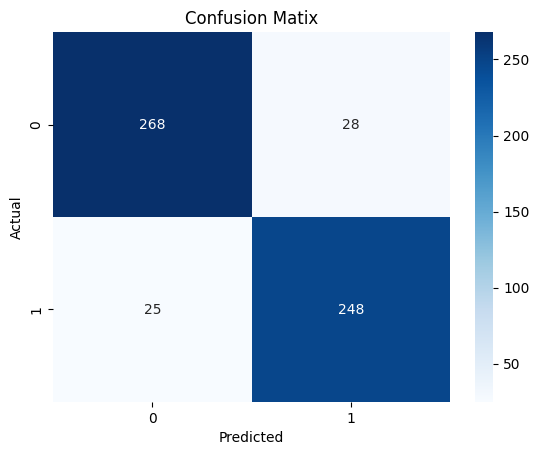

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(labels, preds):
    cn = confusion_matrix(labels, preds)
    sns.heatmap(cn, annot=True, fmt='d', cmap='Blues')

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matix")
    plt.show()

plot_confusion_matrix(tokenized_datasets["test"]["labels"], y_pred)

